<a href="https://colab.research.google.com/github/kha-iman972/Vivante-Khaya-Projects/blob/master/mushroom_inventory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🍄 Mushroom Inventory Tracker with Quantum Risk Optimization

This tool tracks mushroom harvests and helps prioritize batches by spoilage risk using quantum-inspired predictions (via PennyLane). Designed for use by Vivinate Farms and similar sustainable farming projects.

## 🔧 Setup

1. Open Google Colab
2. Install dependencies:
```bash
!pip install pennylane pandas
```

3. Paste and run the code from the notebook

## 📦 Features

- Add, view, update, delete mushroom batches
- Include environment data (humidity, temperature)
- Quantum circuit calculates spoilage "risk score"
- Sort inventory by urgency
- Export to CSV

## 🧠 How Risk Works

A quantum circuit evaluates batch risk based on:
- Weight
- Age (days since harvest)
- Humidity
- Temperature

## 🧪 Example

```python
add_batch("Shiitake", 450, "2025-07-25", "Greenhouse", "Fresh", 75, 18)
rank_inventory_by_risk()
```

## 📤 Exporting

```python
export_to_csv("inventory.csv")
```

## 👩🏽‍🌾 Future Ideas

- Dashboard UI
- Sensor integration
- Spoilage prediction alerts


In [3]:
# 📦 Mushroom Inventory Module (Base Version)
# Compatible with Google Colab

# We'll store data in a list of dictionaries (like mini spreadsheets)
inventory = []

# 🔧 Function to add a mushroom batch
def add_batch(m_type, weight, date, location, status):
    batch = {
        "Type": m_type,
        "Weight (g)": weight,
        "Harvest Date": date,
        "Location": location,
        "Status": status
    }
    inventory.append(batch)
    print(f"✅ Added: {batch}")

# 🧾 Function to view all inventory
def view_inventory():
    if not inventory:
        print("No inventory data.")
    for i, batch in enumerate(inventory):
        print(f"{i}: {batch}")

# ✏️ Function to update a batch
def update_batch(index, key, new_value):
    if 0 <= index < len(inventory):
        inventory[index][key] = new_value
        print(f"✅ Updated batch {index}: {key} → {new_value}")
    else:
        print("Invalid index.")

# ❌ Function to delete a batch
def delete_batch(index):
    if 0 <= index < len(inventory):
        removed = inventory.pop(index)
        print(f"🗑️ Removed: {removed}")
    else:
        print("Invalid index.")

# 📤 Optional: Export to CSV (in Colab)
import pandas as pd

def export_to_csv(filename="mushroom_inventory.csv"):
    df = pd.DataFrame(inventory)
    df.to_csv(filename, index=False)
    print(f"📁 Exported to {filename}")


In [4]:
add_batch("Shiitake", 500, "2025-07-29", "North Greenhouse", "Fresh")
add_batch("Oyster", 300, "2025-07-27", "South Bay", "Fresh")

view_inventory()

update_batch(1, "Weight (g)", 350)

delete_batch(0)

export_to_csv()


✅ Added: {'Type': 'Shiitake', 'Weight (g)': 500, 'Harvest Date': '2025-07-29', 'Location': 'North Greenhouse', 'Status': 'Fresh'}
✅ Added: {'Type': 'Oyster', 'Weight (g)': 300, 'Harvest Date': '2025-07-27', 'Location': 'South Bay', 'Status': 'Fresh'}
0: {'Type': 'Shiitake', 'Weight (g)': 500, 'Harvest Date': '2025-07-29', 'Location': 'North Greenhouse', 'Status': 'Fresh'}
1: {'Type': 'Oyster', 'Weight (g)': 300, 'Harvest Date': '2025-07-27', 'Location': 'South Bay', 'Status': 'Fresh'}
✅ Updated batch 1: Weight (g) → 350
🗑️ Removed: {'Type': 'Shiitake', 'Weight (g)': 500, 'Harvest Date': '2025-07-29', 'Location': 'North Greenhouse', 'Status': 'Fresh'}
📁 Exported to mushroom_inventory.csv


In [5]:
add_batch("Shiitake", 450, "2025-07-28", "North Greenhouse", "Fresh")
add_batch("Lion's Mane", 320, "2025-07-27", "East Bay", "Fresh")
add_batch("Oyster", 210, "2025-07-25", "Tunnel Room", "Fresh")


✅ Added: {'Type': 'Shiitake', 'Weight (g)': 450, 'Harvest Date': '2025-07-28', 'Location': 'North Greenhouse', 'Status': 'Fresh'}
✅ Added: {'Type': "Lion's Mane", 'Weight (g)': 320, 'Harvest Date': '2025-07-27', 'Location': 'East Bay', 'Status': 'Fresh'}
✅ Added: {'Type': 'Oyster', 'Weight (g)': 210, 'Harvest Date': '2025-07-25', 'Location': 'Tunnel Room', 'Status': 'Fresh'}


In [6]:
view_inventory()


0: {'Type': 'Oyster', 'Weight (g)': 350, 'Harvest Date': '2025-07-27', 'Location': 'South Bay', 'Status': 'Fresh'}
1: {'Type': 'Shiitake', 'Weight (g)': 450, 'Harvest Date': '2025-07-28', 'Location': 'North Greenhouse', 'Status': 'Fresh'}
2: {'Type': "Lion's Mane", 'Weight (g)': 320, 'Harvest Date': '2025-07-27', 'Location': 'East Bay', 'Status': 'Fresh'}
3: {'Type': 'Oyster', 'Weight (g)': 210, 'Harvest Date': '2025-07-25', 'Location': 'Tunnel Room', 'Status': 'Fresh'}


In [7]:
update_batch(1, "Status", "Expired")


✅ Updated batch 1: Status → Expired


In [8]:
delete_batch(2)


🗑️ Removed: {'Type': "Lion's Mane", 'Weight (g)': 320, 'Harvest Date': '2025-07-27', 'Location': 'East Bay', 'Status': 'Fresh'}


In [9]:
export_to_csv("test_inventory.csv")


📁 Exported to test_inventory.csv


In [10]:
from google.colab import files
files.download("test_inventory.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
!pip install pennylane


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 78.8 MB/s eta 0:00:00


In [12]:
from datetime import datetime
import pennylane as qml
from pennylane import numpy as np

# Sample mini dataset (simulate from inventory)
batches = [
    {"Type": "Shiitake", "Weight": 450, "DaysOld": 1},
    {"Type": "Lion's Mane", "Weight": 320, "DaysOld": 2},
    {"Type": "Oyster", "Weight": 210, "DaysOld": 4}
]

# Normalize inputs (0 to 1)
def normalize(val, max_val):
    return val / max_val

# Create quantum circuit to assign spoilage risk
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def risk_circuit(weight_norm, age_norm):
    qml.RY(weight_norm * np.pi, wires=0)
    qml.RZ(age_norm * np.pi, wires=0)
    return qml.expval(qml.PauliZ(0))  # Measurement

# Use circuit to get spoilage risk (lower = more risk)
for batch in batches:
    w = normalize(batch["Weight"], 500)
    d = normalize(batch["DaysOld"], 7)
    score = risk_circuit(w, d)
    batch["RiskScore"] = 1 - (score + 1)/2  # Convert -1 to +1 → 0 to 1


In [13]:
# Print ranked list by risk
ranked = sorted(batches, key=lambda x: x["RiskScore"], reverse=True)
for b in ranked:
    print(f"{b['Type']} - Risk Score: {b['RiskScore']:.3f}")


Shiitake - Risk Score: 0.976
Lion's Mane - Risk Score: 0.713
Oyster - Risk Score: 0.376


In [14]:
add_batch("Shiitake", 450, "2025-07-25", "North Greenhouse", "Fresh", 75, 18)


TypeError: add_batch() takes 5 positional arguments but 7 were given

In [15]:
# 🌱 Mushroom Inventory with Advanced Risk Tracking

inventory = []

# 🆕 Updated Add Function
def add_batch(m_type, weight, date, location, status, humidity, temperature):
    batch = {
        "Type": m_type,
        "Weight (g)": weight,
        "Harvest Date": date,
        "Location": location,
        "Status": status,
        "Humidity (%)": humidity,
        "Temperature (°C)": temperature,
        "DaysOld": estimate_days_old(date)
    }
    inventory.append(batch)
    print(f"✅ Added: {batch}")

# Estimate age from date
from datetime import datetime

def estimate_days_old(harvest_date):
    today = datetime.today()
    date_obj = datetime.strptime(harvest_date, "%Y-%m-%d")
    return (today - date_obj).days


In [16]:
# ✅ Quantum Risk Scoring with PennyLane
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def quantum_risk(weight_norm, age_norm, humidity_norm, temp_norm):
    qml.RY(weight_norm * np.pi, wires=0)
    qml.RZ(age_norm * np.pi, wires=0)
    qml.RY(humidity_norm * np.pi / 2, wires=0)
    qml.RZ(temp_norm * np.pi / 2, wires=0)
    return qml.expval(qml.PauliZ(0))

# Normalize helper
def normalize(val, max_val):
    return min(max(val / max_val, 0), 1)

# 🧪 Rank function
def rank_inventory_by_risk():
    if not inventory:
        print("Inventory empty.")
        return

    for batch in inventory:
        w = normalize(batch["Weight (g)"], 500)
        a = normalize(batch["DaysOld"], 10)
        h = normalize(batch["Humidity (%)"], 100)
        t = normalize(batch["Temperature (°C)"], 40)

        score = quantum_risk(w, a, h, t)
        batch["Risk Score"] = 1 - (score + 1)/2  # Flip to risk ↑

    # Sort by risk
    sorted_inv = sorted(inventory, key=lambda x: x["Risk Score"], reverse=True)

    print("\n📊 Ranked Mushroom Batches by Spoilage Risk:")
    for b in sorted_inv:
        print(f"{b['Type']} - Risk Score: {b['Risk Score']:.3f}")


In [17]:
# Add sample entries
add_batch("Shiitake", 450, "2025-07-25", "North Greenhouse", "Fresh", 75, 18)
add_batch("Lion's Mane", 320, "2025-07-28", "East Bay", "Fresh", 82, 22)
add_batch("Oyster", 210, "2025-07-26", "Tunnel Room", "Fresh", 90, 25)

# Rank by spoilage risk
rank_inventory_by_risk()


✅ Added: {'Type': 'Shiitake', 'Weight (g)': 450, 'Harvest Date': '2025-07-25', 'Location': 'North Greenhouse', 'Status': 'Fresh', 'Humidity (%)': 75, 'Temperature (°C)': 18, 'DaysOld': 4}
✅ Added: {'Type': "Lion's Mane", 'Weight (g)': 320, 'Harvest Date': '2025-07-28', 'Location': 'East Bay', 'Status': 'Fresh', 'Humidity (%)': 82, 'Temperature (°C)': 22, 'DaysOld': 1}
✅ Added: {'Type': 'Oyster', 'Weight (g)': 210, 'Harvest Date': '2025-07-26', 'Location': 'Tunnel Room', 'Status': 'Fresh', 'Humidity (%)': 90, 'Temperature (°C)': 25, 'DaysOld': 3}

📊 Ranked Mushroom Batches by Spoilage Risk:
Lion's Mane - Risk Score: 0.973
Oyster - Risk Score: 0.762
Shiitake - Risk Score: 0.726


In [18]:
import pandas as pd

def export_to_csv(filename="mushroom_inventory.csv"):
    df = pd.DataFrame(inventory)
    df.to_csv(filename, index=False)
    print(f"📁 Exported to {filename}")


In [19]:
from google.colab import files
files.download("mushroom_inventory.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
def import_from_csv(filename):
    df = pd.read_csv(filename)
    for _, row in df.iterrows():
        batch = {
            "Type": row["Type"],
            "Weight (g)": row["Weight (g)"],
            "Harvest Date": row["Harvest Date"],
            "Location": row["Location"],
            "Status": row["Status"],
            "Humidity (%)": row["Humidity (%)"],
            "Temperature (°C)": row["Temperature (°C)"],
            "DaysOld": estimate_days_old(row["Harvest Date"])
        }
        inventory.append(batch)
    print(f"✅ Imported {len(df)} items from {filename}")


In [21]:
from google.colab import files
uploaded = files.upload()


Saving mushroom_inventory.csv to mushroom_inventory (1).csv


In [22]:
!pip install matplotlib


In [23]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_weight_by_type():
    if not inventory:
        print("Inventory empty.")
        return

    df = pd.DataFrame(inventory)
    grouped = df.groupby("Type")["Weight (g)"].sum()

    grouped.plot(kind="bar")
    plt.title("Total Weight per Mushroom Type")
    plt.xlabel("Type")
    plt.ylabel("Weight (g)")
    plt.tight_layout()
    plt.show()


In [24]:
def plot_risk_scores():
    if not inventory or "Risk Score" not in inventory[0]:
        print("Run `rank_inventory_by_risk()` first.")
        return

    df = pd.DataFrame(inventory)
    plt.bar(df["Type"], df["Risk Score"], color="orange")
    plt.title("Spoilage Risk Score by Type")
    plt.xlabel("Mushroom Type")
    plt.ylabel("Risk Score (0 = low, 1 = high)")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


In [25]:
!pip install gradio


In [26]:
import gradio as gr

def gradio_add_batch(m_type, weight, date, location, status, humidity, temp):
    add_batch(m_type, weight, date, location, status, humidity, temp)
    return f"✅ Added: {m_type}, {weight}g, {status}"

gr.Interface(
    fn=gradio_add_batch,
    inputs=[
        gr.Textbox(label="Type"),
        gr.Number(label="Weight (g)"),
        gr.Textbox(label="Harvest Date (YYYY-MM-DD)"),
        gr.Textbox(label="Location"),
        gr.Dropdown(["Fresh", "Expired", "Sold"], label="Status"),
        gr.Slider(50, 100, label="Humidity (%)"),
        gr.Slider(10, 40, label="Temperature (°C)")
    ],
    outputs="text",
    title="🍄 Add Mushroom Batch"
).launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ceec2ae4862c77e8d8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [27]:
def import_sensor_csv(filename):
    df = pd.read_csv(filename)
    for _, row in df.iterrows():
        add_batch(
            row["Type"],
            row["Weight (g)"],
            row["Harvest Date"],
            row["Location"],
            row["Status"],
            row["Humidity (%)"],
            row["Temperature (°C)"]
        )


In [29]:
from google.colab import files
files.upload()
import_sensor_csv("your_sensor_data.csv")


Saving sample_sensor_inventory.csv to sample_sensor_inventory.csv


FileNotFoundError: [Errno 2] No such file or directory: 'your_sensor_data.csv'

In [30]:
# 📦 STEP 1: Upload the CSV
from google.colab import files
uploaded = files.upload()  # Upload your CSV here (sample_sensor_inventory.csv)

# 🧾 STEP 2: Import pandas and your existing add_batch/estimate_days_old functions
import pandas as pd
from datetime import datetime

# Estimate days old from harvest date
def estimate_days_old(harvest_date):
    today = datetime.today()
    date_obj = datetime.strptime(harvest_date, "%Y-%m-%d")
    return (today - date_obj).days

# Re-declare inventory if needed
inventory = []

# Existing add_batch function (extended with humidity and temp)
def add_batch(m_type, weight, date, location, status, humidity, temperature):
    batch = {
        "Type": m_type,
        "Weight (g)": weight,
        "Harvest Date": date,
        "Location": location,
        "Status": status,
        "Humidity (%)": humidity,
        "Temperature (°C)": temperature,
        "DaysOld": estimate_days_old(date)
    }
    inventory.append(batch)
    print(f"✅ Added: {batch}")

# 🧩 STEP 3: Function to import from uploaded CSV
def import_sensor_csv(filename):
    df = pd.read_csv(filename)
    for _, row in df.iterrows():
        add_batch(
            row["Type"],
            row["Weight (g)"],
            row["Harvest Date"],
            row["Location"],
            row["Status"],
            row["Humidity (%)"],
            row["Temperature (°C)"]
        )
    print(f"\n📥 Imported {len(df)} batches from {filename}")

# ✅ STEP 4: Use the correct filename here!
import_sensor_csv("sample_sensor_inventory.csv")

# 🧪 Optional: View inventory after import
def view_inventory():
    if not inventory:
        print("Inventory is empty.")
    for i, batch in enumerate(inventory):
        print(f"{i}: {batch}")

view_inventory()


Saving sample_sensor_inventory.csv to sample_sensor_inventory (1).csv
✅ Added: {'Type': 'Shiitake', 'Weight (g)': 420, 'Harvest Date': '2025-07-27', 'Location': 'Greenhouse A', 'Status': 'Fresh', 'Humidity (%)': 80, 'Temperature (°C)': 21, 'DaysOld': 2}
✅ Added: {'Type': "Lion's Mane", 'Weight (g)': 350, 'Harvest Date': '2025-07-26', 'Location': 'East Tunnel', 'Status': 'Fresh', 'Humidity (%)': 85, 'Temperature (°C)': 22, 'DaysOld': 3}
✅ Added: {'Type': 'Oyster', 'Weight (g)': 275, 'Harvest Date': '2025-07-25', 'Location': 'North Bay', 'Status': 'Expired', 'Humidity (%)': 90, 'Temperature (°C)': 23, 'DaysOld': 4}

📥 Imported 3 batches from sample_sensor_inventory.csv
0: {'Type': 'Shiitake', 'Weight (g)': 420, 'Harvest Date': '2025-07-27', 'Location': 'Greenhouse A', 'Status': 'Fresh', 'Humidity (%)': 80, 'Temperature (°C)': 21, 'DaysOld': 2}
1: {'Type': "Lion's Mane", 'Weight (g)': 350, 'Harvest Date': '2025-07-26', 'Location': 'East Tunnel', 'Status': 'Fresh', 'Humidity (%)': 85, 'Tem

In [31]:
# Redefine inventory
inventory = []

# Updated add_batch with Light and CO2
def add_batch(m_type, weight, date, location, status, humidity, temp, light, co2):
    batch = {
        "Type": m_type,
        "Weight (g)": weight,
        "Harvest Date": date,
        "Location": location,
        "Status": status,
        "Humidity (%)": humidity,
        "Temperature (°C)": temp,
        "Light (hrs/day)": light,
        "CO2 (ppm)": co2,
        "DaysOld": estimate_days_old(date)
    }
    inventory.append(batch)
    print(f"✅ Added: {batch}")


In [32]:
def import_sensor_csv(filename):
    df = pd.read_csv(filename)
    for _, row in df.iterrows():
        add_batch(
            row["Type"],
            row["Weight (g)"],
            row["Harvest Date"],
            row["Location"],
            row["Status"],
            row["Humidity (%)"],
            row["Temperature (°C)"],
            row["Light Exposure (hrs/day)"],
            row["CO2 Level (ppm)"]
        )
    print(f"\n📥 Imported {len(df)} batches from {filename}")


In [33]:
from google.colab import files
files.upload()
import_sensor_csv("updated_sensor_inventory.csv")


Saving updated_sensor_inventory.csv to updated_sensor_inventory.csv
✅ Added: {'Type': 'Shiitake', 'Weight (g)': 420, 'Harvest Date': '2025-07-27', 'Location': 'Greenhouse A', 'Status': 'Fresh', 'Humidity (%)': 80, 'Temperature (°C)': 21, 'Light (hrs/day)': 6, 'CO2 (ppm)': 400, 'DaysOld': 2}
✅ Added: {'Type': "Lion's Mane", 'Weight (g)': 350, 'Harvest Date': '2025-07-26', 'Location': 'East Tunnel', 'Status': 'Fresh', 'Humidity (%)': 85, 'Temperature (°C)': 22, 'Light (hrs/day)': 8, 'CO2 (ppm)': 420, 'DaysOld': 3}
✅ Added: {'Type': 'Oyster', 'Weight (g)': 275, 'Harvest Date': '2025-07-25', 'Location': 'North Bay', 'Status': 'Expired', 'Humidity (%)': 90, 'Temperature (°C)': 23, 'Light (hrs/day)': 4, 'CO2 (ppm)': 410, 'DaysOld': 4}

📥 Imported 3 batches from updated_sensor_inventory.csv


In [34]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def quantum_risk_extended(*norm_factors):
    for i, factor in enumerate(norm_factors):
        if i % 2 == 0:
            qml.RY(factor * np.pi, wires=0)
        else:
            qml.RZ(factor * np.pi, wires=0)
    return qml.expval(qml.PauliZ(0))

def normalize(val, max_val):
    return min(max(val / max_val, 0), 1)

def rank_inventory_by_risk():
    if not inventory:
        print("Inventory is empty.")
        return

    for batch in inventory:
        factors = [
            normalize(batch["Weight (g)"], 500),
            normalize(batch["DaysOld"], 10),
            normalize(batch["Humidity (%)"], 100),
            normalize(batch["Temperature (°C)"], 40),
            normalize(batch["Light (hrs/day)"], 12),
            normalize(batch["CO2 (ppm)"], 1000)
        ]
        score = quantum_risk_extended(*factors)
        batch["Risk Score"] = 1 - (score + 1) / 2  # Scale to 0-1

    sorted_inv = sorted(inventory, key=lambda x: x["Risk Score"], reverse=True)

    print("\n📊 Ranked Mushroom Batches by Spoilage Risk:")
    for b in sorted_inv:
        print(f"{b['Type']} - Risk Score: {b['Risk Score']:.3f}")


In [35]:
import matplotlib.pyplot as plt

def plot_risk_scores():
    if not inventory or "Risk Score" not in inventory[0]:
        print("Please run `rank_inventory_by_risk()` first.")
        return

    df = pd.DataFrame(inventory)
    plt.figure(figsize=(8, 5))
    plt.bar(df["Type"], df["Risk Score"], color="tomato")
    plt.title("🍄 Mushroom Spoilage Risk Scores")
    plt.ylabel("Risk Score (0 = safe, 1 = risky)")
    plt.ylim(0, 1)
    plt.xlabel("Mushroom Type")
    plt.tight_layout()
    plt.show()


In [36]:
from google.colab import files
files.upload()
import_sensor_csv("updated_sensor_inventory.csv")


Saving updated_sensor_inventory.csv to updated_sensor_inventory (1).csv
✅ Added: {'Type': 'Shiitake', 'Weight (g)': 420, 'Harvest Date': '2025-07-27', 'Location': 'Greenhouse A', 'Status': 'Fresh', 'Humidity (%)': 80, 'Temperature (°C)': 21, 'Light (hrs/day)': 6, 'CO2 (ppm)': 400, 'DaysOld': 2}
✅ Added: {'Type': "Lion's Mane", 'Weight (g)': 350, 'Harvest Date': '2025-07-26', 'Location': 'East Tunnel', 'Status': 'Fresh', 'Humidity (%)': 85, 'Temperature (°C)': 22, 'Light (hrs/day)': 8, 'CO2 (ppm)': 420, 'DaysOld': 3}
✅ Added: {'Type': 'Oyster', 'Weight (g)': 275, 'Harvest Date': '2025-07-25', 'Location': 'North Bay', 'Status': 'Expired', 'Humidity (%)': 90, 'Temperature (°C)': 23, 'Light (hrs/day)': 4, 'CO2 (ppm)': 410, 'DaysOld': 4}

📥 Imported 3 batches from updated_sensor_inventory.csv


In [37]:
rank_inventory_by_risk()



📊 Ranked Mushroom Batches by Spoilage Risk:
Shiitake - Risk Score: 0.391
Shiitake - Risk Score: 0.391
Lion's Mane - Risk Score: 0.344
Lion's Mane - Risk Score: 0.344
Oyster - Risk Score: 0.125
Oyster - Risk Score: 0.125


/tmp/ipython-input-35-2830195042.py:15: UserWarning: Glyph 127812 (\N{MUSHROOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127812 (\N{MUSHROOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


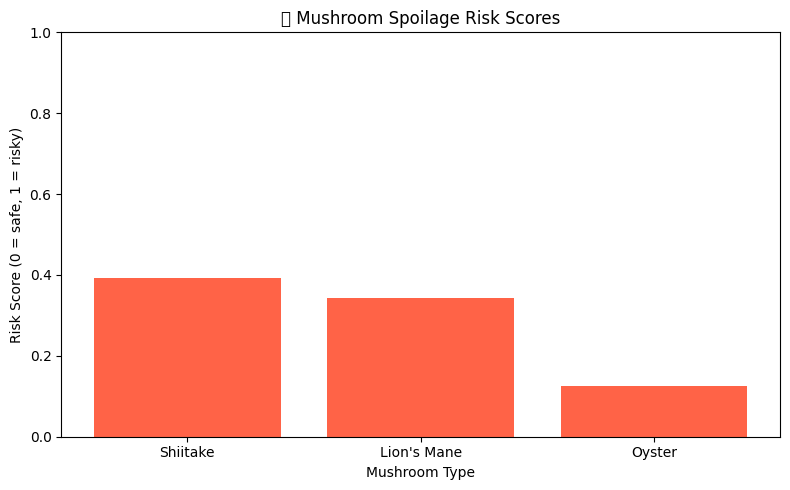

In [38]:
plot_risk_scores()


In [39]:
print("👋 Welcome to the Mushroom Inventory Tracker!")
print("Use `add_batch()` or upload a CSV → run `rank_inventory_by_risk()` → view results.")


👋 Welcome to the Mushroom Inventory Tracker!
Use `add_batch()` or upload a CSV → run `rank_inventory_by_risk()` → view results.


In [40]:
def safe_date_parser(date_str):
    try:
        return datetime.strptime(date_str, "%Y-%m-%d")
    except:
        print("❗ Invalid date format. Use YYYY-MM-DD.")
        return datetime.today()
